##  Predicting Wine Quality: Insights from Physicochemical Properties  🍷
Group 6: Felix Li, Gurman Gill, Dia Zavery, Steve He

## 1. Summary
[Summary]

## 2. Introduction

Wine has been a symbol of culture and refinement throughout human history, with its production dating back thousands of years. The complexity of wine, influenced by its physicochemical properties, has fascinated scientists and winemakers alike. In recent years, the wine industry has increasingly turned to data analysis and machine learning to understand and predict wine quality. This scientific approach aims to decode the relationship between the chemical composition of wine and its quality as perceived by consumers.

Our analysis seeks to answer the following question: **How do pH, residual sugar, chlorides, and sulphates in wine influence its sensory quality rating?** **Temporary Question until we Fine-Tune it more** 

By addressing this question, we aim to uncover the physicochemical traits that most significantly impact wine quality, providing a data-driven foundation for enhancing wine production and selection processes. The dataset we use comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality), featuring two datasets related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets include 4,898 instances, with 11 features covering various physicochemical properties (such as acidity, sugar level, alcohol content) and 1 output variable representing sensory quality ratings on a scale. The datasets present an opportunity for both classification and regression analyses to model wine quality based on these properties.

In our analysis, we aim to explore how specific physicochemical properties—namely pH, residual sugar, chlorides, and sulphates—affect the sensory quality of wine. These variables were chosen due to their significant influence on the taste, stability, and overall appeal of wine, making them key factors in determining wine quality.

[pH is pivotal in balancing acidity and stability, influencing wine's taste and color. Lower pH indicates higher acidity, contributing to freshness but potentially leading to sharpness, while higher pH can enhance smoothness at the risk of quicker oxidation.](https://atlas-scientific.com/blog/the-importance-of-ph-in-wine-making/)
Residual Sugar affects sweetness levels, directly impacting consumer preference and marketability. The sugar left after fermentation dictates whether a wine is dry, semi-sweet, or sweet, playing a crucial role in its sensory profile.
Chlorides offer insights into the saltiness and flavor profile of wine, which can be influenced by the terroir or winemaking practices. Understanding chloride levels helps in assessing the subtle taste nuances and their effect on quality.
Sulphates are essential for wine preservation, preventing oxidation and microbial growth. However, their impact on taste and potential for causing allergic reactions necessitates a careful balance to maintain wine integrity without compromising sensory quality.
By focusing on these variables, our analysis seeks to quantify their collective impact on wine quality, providing valuable insights for enhancing wine production and selection. This targeted approach allows us to uncover the complex interplay between chemical composition and sensory perception, aiming to identify the physicochemical traits that most significantly contribute to high-quality wine.

This analysis is significant for several reasons. Firstly, it offers insights into the factors that contribute to the sensory quality of wine, potentially aiding winemakers in refining their craft. Secondly, by identifying the key predictors of wine quality, our project can help consumers make informed choices. Finally, this research contributes to the academic field of oenology, expanding our understanding of the science behind wine quality.

## 3. Methods

### 3.1 Data cleaning and wrangling 

In [2]:
library(tidyverse)
library(dplyr)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
data <- read.csv("data/winequality-red.csv",sep = ";")
head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [4]:
levels(as.factor(data$quality))

[1] "3" "4" "5" "6" "7" "8"

**manually define: If quality > 5, then red wine has good quality. If quality <= 5, then red wine has bad quality**

In [5]:
data2 <- data %>%
  mutate(quality = ifelse(quality <= 5, "bad", "good"))
head(data2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,bad
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,bad
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,bad


### 3.2. Exploratory Data Analysis

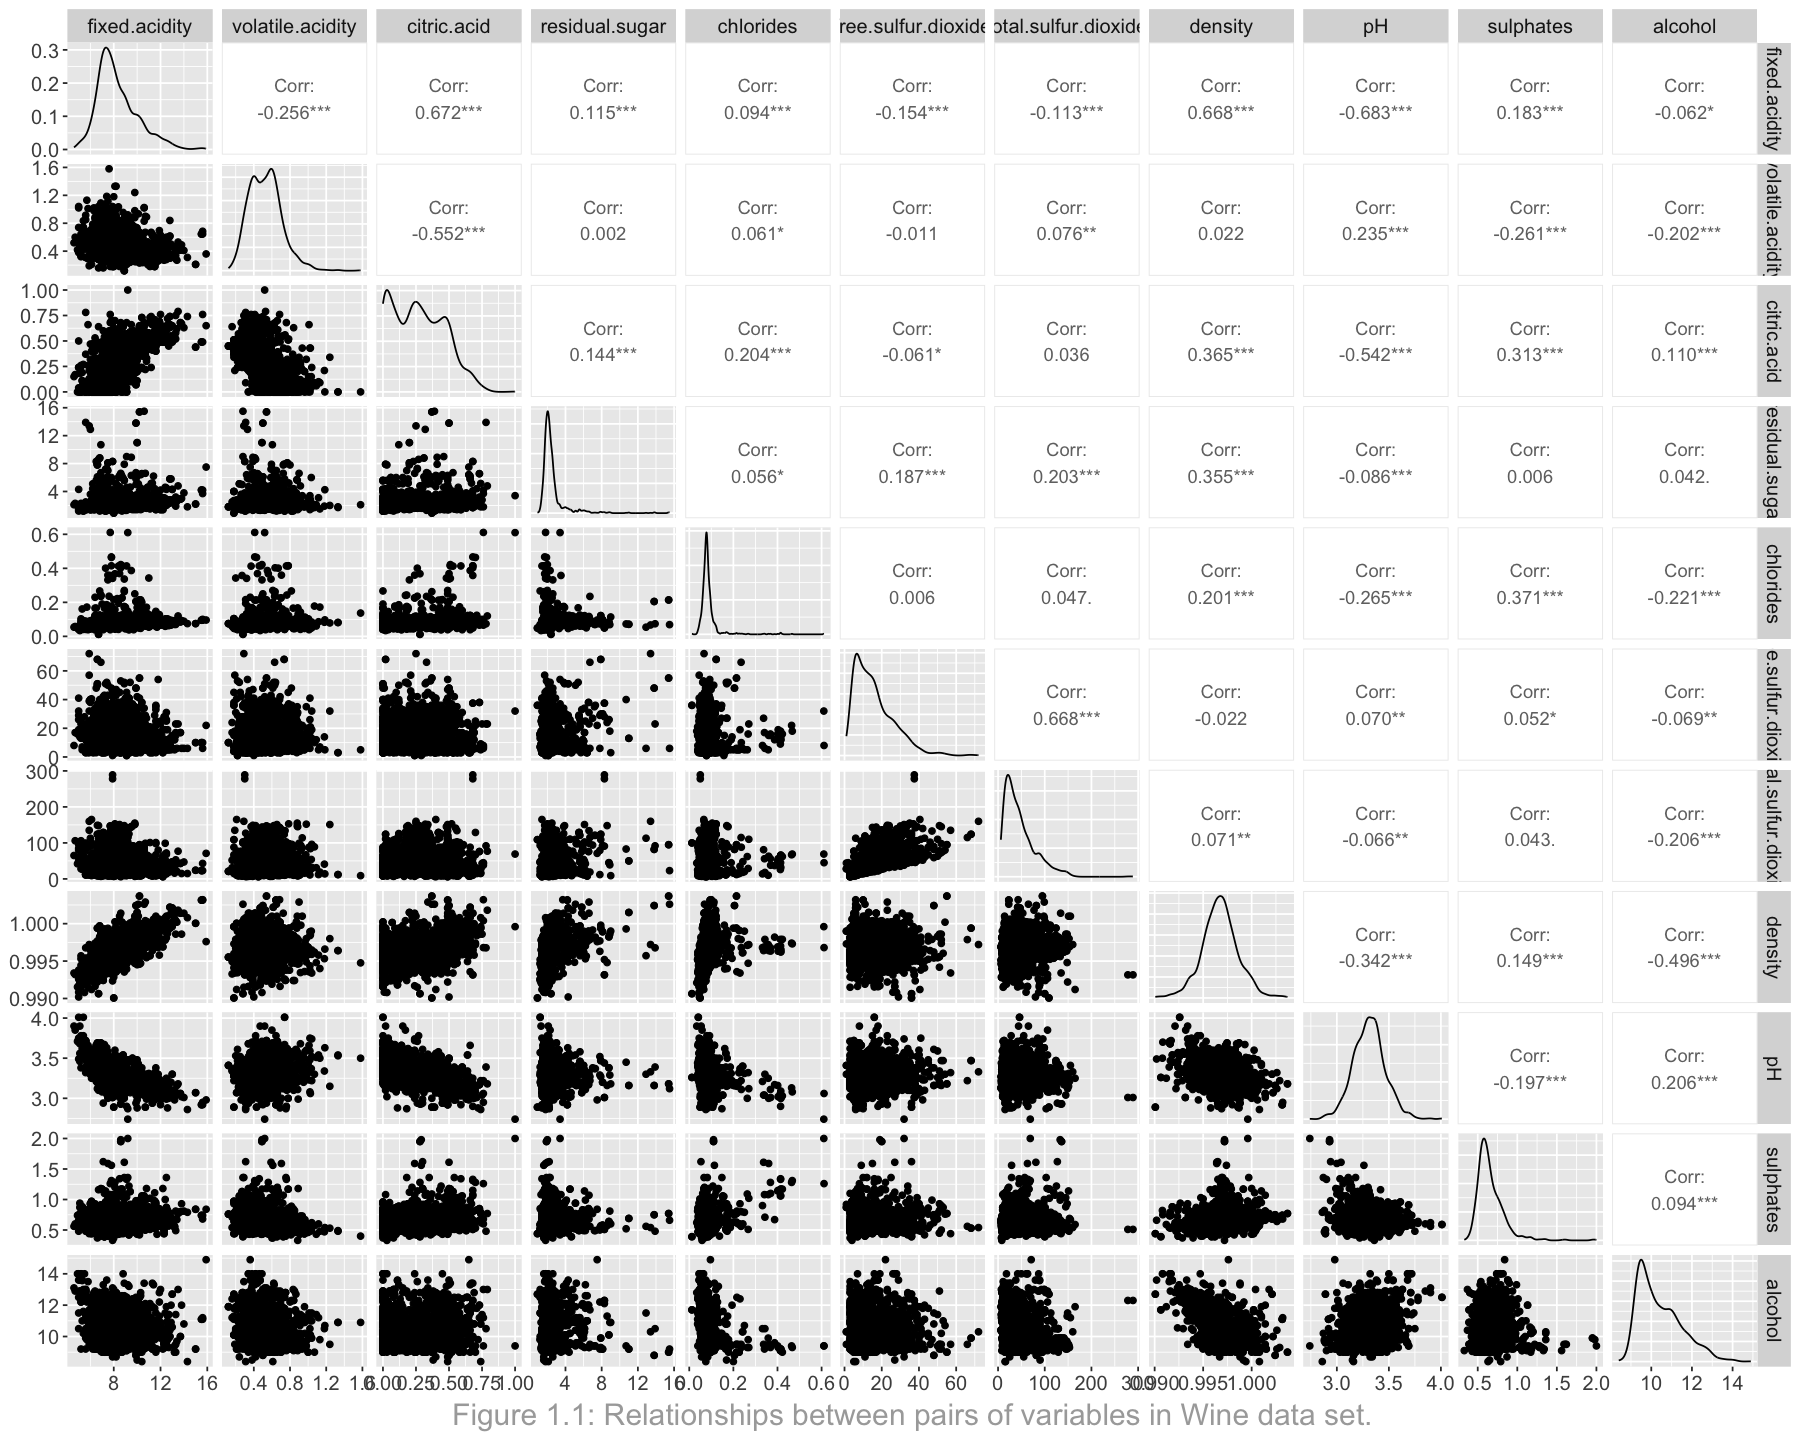

In [6]:
options(repr.plot.width = 15, repr.plot.height = 12)

correlation_plots <- data %>%
  select(- quality) %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.caption = element_text(color = "darkgrey", size = 18, hjust = 0.5, vjust = 1)
  ) + 
  labs(caption = "Figure 1.1: Relationships between pairs of variables in Wine data set.")
  
  
correlation_plots

**Move the variables that has high correlation with others**


- citric.acid and fixed acidity
- PH and citric.acid
- density and fixed acidity
- free.sulfur.dioxide and total.sulfur.dioxide

we decide to remove citric.acid, density, PH and free.sulfur.dioxide 

In [7]:
df <- subset(data2, select = -c(citric.acid,density,pH,free.sulfur.dioxide))
head(df) 

,fixed.acidity,volatile.acidity,residual.sugar,chlorides,total.sulfur.dioxide,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,1.9,0.076,34,0.56,9.4,bad
2,7.8,0.88,2.6,0.098,67,0.68,9.8,bad
3,7.8,0.76,2.3,0.092,54,0.65,9.8,bad
4,11.2,0.28,1.9,0.075,60,0.58,9.8,good
5,7.4,0.70,1.9,0.076,34,0.56,9.4,bad
6,7.4,0.66,1.8,0.075,40,0.56,9.4,bad


## 4. Discussion

### 4.1. Summary and Expectations

[Do after Methods and Results]

### 4.2. Impact and Future Questions

[Impact done after Methods and Results]

Building on our initial analysis, future research could explore the impact of environmental changes like climate on the physicochemical composition of wine, delve into the genetic factors influencing grape quality, and employ advanced machine learning algorithms to uncover complex relationships between wine characteristics and sensory perceptions. Specifically, alternative data analysis methods such as deep learning and neural networks could be employed to analyze large datasets more effectively, identifying non-linear relationships and subtle patterns that traditional statistical methods may miss. Additionally, integrating big data analytics to process and analyze the vast amount of data generated from different wine regions could offer unprecedented insights into regional and varietal influences on wine quality. Investigating alternative fermentation techniques and conducting comparative studies across different wine regions could reveal new insights into optimizing wine quality. These efforts should embrace interdisciplinary approaches, combining advanced data analysis, biotechnology, and sensory evaluation to enhance our understanding of wine quality. Such research would not only deepen our knowledge of the factors affecting wine but also support the industry in adapting to evolving challenges and preferences, ultimately enriching the wine production and selection process.

## 5. References
Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Data set]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T

Atlas Scientific. (n.d.). The Importance of pH In Wine-Making. Retrieved from https://www.atlas-scientific.com/